In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 80
sns.set()

In [2]:
from synthesizer import Synthesizer
from generator import Generator
from algorithm import Algorithm

In [3]:
# Cоздание синтезатора, генерирующего workers_num векторов весов размерности dim, для каждого из которых создает по генератору временного ряда.
# Сигнал - случайный вектор из нормального распределения. Отклик - скалярное произведение сигнала на вектор весов плюс нормальный шум из N(0,1)
synt = Synthesizer(dim=20, low=-20, high=20, noise_var=1, workers_num=4, random_seed=18)

# Создание генератора данных, склеивающего разнородные временные ряды в один 
# В данном случае источник рядов - наш синтезатор
gen = Generator(synt)


# Получение итогового временного ряда путем получения от синтезатора pieces_num временных рядов 
# произвольного размера из [lower_bound, upper_bound) и их последующей склейки
gen.generate(pieces_num=15, lower_bound=80, upper_bound=100, alternating=True)

# Cоздание объекта GMMP алгоритма, работающего total_time итераций, добавляющего экспертов с периодичностью period
# Каждый эксперт представляет из себя LinReg модель, которая при инициализации тренируется на последних train_window точках
algo = Algorithm(gen, total_time=gen.total_time, train_window=20, a=-100, b=100)

# Запуск алгоритма
algo.run()



100%|████████████████████████████████████████████████████████████████████████| 1327/1327 [00:17<00:00, 77.95it/s]


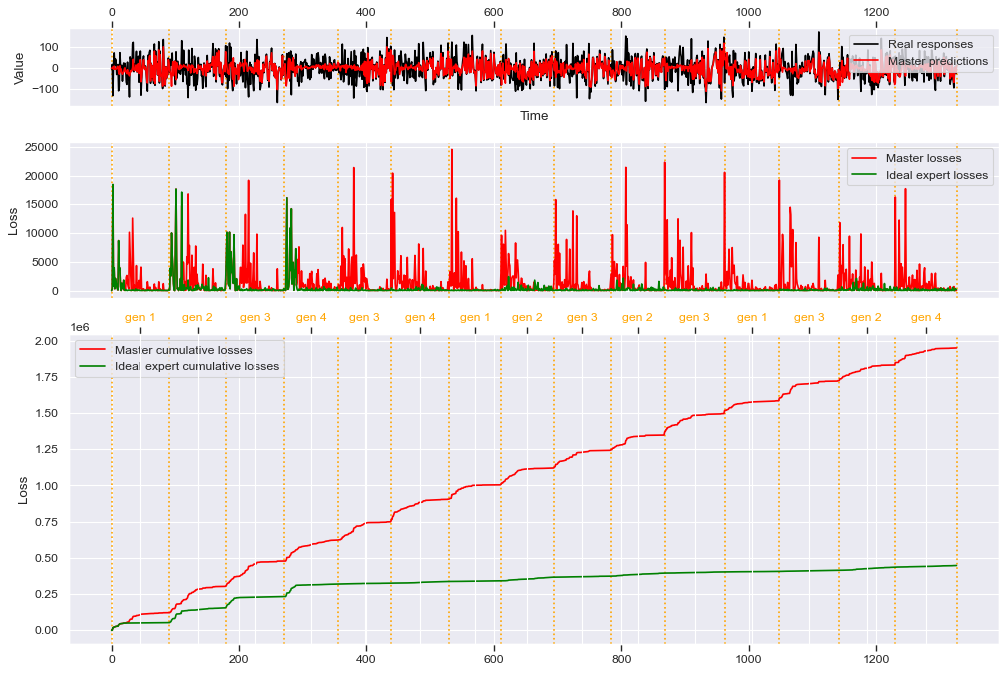

In [4]:
algo.draw_all()

In [5]:
import numpy as np
a = np.array([1, 2, 4])
a[0:2] = 3
a

array([3, 3, 4])